## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): Никифоров Михаил 

### Общая информация

__Дата выдачи:__ 04.03.2020

__Дедлайн:__ 23:59 19.03.2020

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / \text{max points},
$$

где points — количество баллов, которое вы набрали, max_points - максимальное число баллов за задание. Бонусные задания отмечены звездочками (*)

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).


# kNN своими руками (4)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$, а $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

Сверьте для нескольких комбинаций различных параметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn` по метрике качества MSE.

In [9]:
class KNN:
    def __init__(self, metric='euclidean', k=5):
        """
        PARAMETERS:
        metric ('euclidean' or 'manhattan')
        k - number of nearest neighbors
        """
        if metric != 'euclidean' or metric != 'manhattan':
            metric = 'euclidean'
        self.metric = metric
        self.k = k
        self.model = None
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train = X_train
        self.y_train = y_train
        self.model = KDTree(self.X_train, metric = self.metric)
        
        return self
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        data = self.model.query(X_test, k = self.k)
        indexes = data[1]
        distances = data[0]
        result = list()
        for i in range(X_test.shape[0]):
            current_indexes = indexes[i]
            current_distances = np.ones(self.k)/distances[i]
            current_result = 0
            for j in range(self.k):
                current_result += current_distances[j]*y_train[current_indexes[j]]
            result.append(current_result/np.sum(current_distances))
        return np.array(result)

In [10]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [14]:
my_model = KNN(metric='euclidean', k = 5)
sk_model = KNeighborsRegressor(metric='euclidean', n_neighbors=5)
my_model.fit(X_train, y_train)
sk_model.fit(X_train, y_train)
print("My MSE = "+str(mean_squared_error(my_model.predict(X_test), y_test)))
print("SKLearn MSE = "+str(mean_squared_error(sk_model.predict(X_test), y_test)))

My MSE = 1.143364989935662
SKLearn MSE = 1.143019350619603


In [19]:
my_model = KNN(metric='euclidean', k = 10)
sk_model = KNeighborsRegressor(metric='euclidean', n_neighbors = 10)
my_model.fit(X_train, y_train)
sk_model.fit(X_train, y_train)
print("My MSE = "+str(mean_squared_error(my_model.predict(X_test), y_test)))
print("SKLearn MSE = "+str(mean_squared_error(sk_model.predict(X_test), y_test)))

My MSE = 1.0752895532072482
SKLearn MSE = 1.0756506817802374


In [20]:
my_model = KNN(metric='manhattan', k = 10)
sk_model = KNeighborsRegressor(metric='manhattan', n_neighbors = 10)
my_model.fit(X_train, y_train)
sk_model.fit(X_train, y_train)
print("My MSE = "+str(mean_squared_error(my_model.predict(X_test), y_test)))
print("SKLearn MSE = "+str(mean_squared_error(sk_model.predict(X_test), y_test)))

My MSE = 1.0752895532072482
SKLearn MSE = 1.0676400678193927


In [21]:
my_model = KNN(metric='manhattan', k = 5)
sk_model = KNeighborsRegressor(metric='manhattan', n_neighbors = 5)
my_model.fit(X_train, y_train)
sk_model.fit(X_train, y_train)
print("My MSE = "+str(mean_squared_error(my_model.predict(X_test), y_test)))
print("SKLearn MSE = "+str(mean_squared_error(sk_model.predict(X_test), y_test)))

My MSE = 1.143364989935662
SKLearn MSE = 1.1781020576821544


# Линейная регрессия своими руками (4)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [142]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        
        vectors = list()
        errors = list()
        
        
        self.w = np.zeros(X_train.shape[1])
        steps = 0
        
        for i in range(self.max_iter):
            steps += 1
            gradient = self.calc_gradient(X_train, y_train)
            if np.linalg.norm(gradient) <= self.tol:
                break
            
            self.w = self.w - self.eta/steps * gradient
            
            errors.append(self.calc_loss(X_train  ,y_train))
            vectors.append(np.linalg.norm(gradient))
        return np.array(errors), np.array(vectors), steps
            
        
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        result = list()
        for i in range(X_test.shape[0]):
            result.append(np.sum(self.w * X_test[i]))
        return np.array(result)
    
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        """
        y_predicted = X @ self.w
        grad = np.zeros(X.shape[1])
        
        for i in range(X.shape[0]):
            if abs(y_predicted[i] - y[i]) <= self.delta:
                grad += (y_predicted[i] - y[i])*X[i]
            else:
                sign = 1
                if y[i] - y_predicted[i] < 0:
                    sign = -1
                grad += np.ones(X.shape[1])*self.delta*sign
        return grad/X.shape[0]
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        """
        result = 0.0
        y_predicted = X @ self.w
        for i in range(X.shape[0]):
            if abs(y_predicted[i] - y[i]) <= self.delta:
                result += 0.5*(y_predicted[i] - y[i])**2
            else:
                result += self.delta*(abs(y_predicted[i] - y[i])) - 0.5 * (self.delta ** 2)
        return result/X.shape[0]
        

In [96]:
def Huber_accuracy(y_predicted, y, delta = 1.0):
    result = 0.0
    for i in range(y.shape[0]):
        if abs(y_predicted[i] - y[i]) <= delta:
            result += 0.5*(y_predicted[i] - y[i])**2
        else:
            result += delta*(abs(y_predicted[i] - y[i])) - 0.5 * (delta ** 2)
    return result/y.shape[0]

In [138]:
my_reg = LinearRegressionHuber()
sk_reg = LinearRegression()
my_reg.fit(X_train, y_train)
sk_reg.fit(X_train, y_train)
print("My MSE = "+str(mean_squared_error(my_reg.predict(X_test), y_test)))
print("SKLearn MSE = "+str(mean_squared_error(sk_reg.predict(X_test), y_test)))
print("My Huber Loss = "+str(my_reg.calc_loss(X_test, y_test)))
print("SKLearn Huber Loss = "+str(Huber_accuracy(sk_reg.predict(X_test), y_test)))

My MSE = 1.028446563145122
SKLearn MSE = 1.0882539618811702
My Huber Loss = 0.43196946443556916
SKLearn Huber Loss = 0.4522657801427968


In [143]:
new_my_reg = LinearRegressionHuber()
y, vectors, x = new_my_reg.fit(X_train, y_train)
x = np.arange(x)

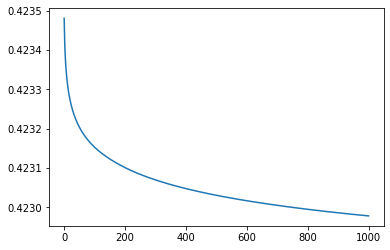

In [145]:
plt.plot(x,y)

# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KDTree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [84]:
data = pd.read_csv('train.csv', header=0)

In [85]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [86]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
data.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [88]:
cols_with_nan = list()
for i in range(len(data.isna().any())):
    if data.isna().any()[i]:
        cols_with_nan.append(data.columns[i])
for line in cols_with_nan:
    print(line)
    print('Колличество : '+str(data[line].loc[data[line].isna() == True].shape[0]))
    print('Доля : '+str(data[line].loc[data[line].isna() == True].shape[0]/data[line].shape[0]))
    print()

LotFrontage
Колличество : 259
Доля : 0.1773972602739726

Alley
Колличество : 1369
Доля : 0.9376712328767123

MasVnrType
Колличество : 8
Доля : 0.005479452054794521

MasVnrArea
Колличество : 8
Доля : 0.005479452054794521

BsmtQual
Колличество : 37
Доля : 0.025342465753424658

BsmtCond
Колличество : 37
Доля : 0.025342465753424658

BsmtExposure
Колличество : 38
Доля : 0.026027397260273973

BsmtFinType1
Колличество : 37
Доля : 0.025342465753424658

BsmtFinType2
Колличество : 38
Доля : 0.026027397260273973

Electrical
Колличество : 1
Доля : 0.0006849315068493151

FireplaceQu
Колличество : 690
Доля : 0.4726027397260274

GarageType
Колличество : 81
Доля : 0.05547945205479452

GarageYrBlt
Колличество : 81
Доля : 0.05547945205479452

GarageFinish
Колличество : 81
Доля : 0.05547945205479452

GarageQual
Колличество : 81
Доля : 0.05547945205479452

GarageCond
Колличество : 81
Доля : 0.05547945205479452

PoolQC
Колличество : 1453
Доля : 0.9952054794520548

Fence
Колличество : 1179
Доля : 0.80753424

Есть признаки, пропусков в которых очень много. Возможно, от них следует избавиться. Колличество пропусков у некоторых признаков практически равно. Возможно, некоторые объекты выборки следует выбросить, а не заниматься заполнением пропусков

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

Для начала удалим те признаки, пропусков в которых больше 80%

In [89]:
data.drop('MiscFeature', axis=1, inplace=True)
data.drop('Fence', axis = 1, inplace=True)
data.drop('PoolQC', axis = 1, inplace=True)
data.drop('Alley', axis = 1, inplace=True)

Теперь разберемся с признаками, пропусков в которых очень-очень мало на фоне размера выборки. Заменим их либо самым популярным значением, либо средним значением в столбце, в зависсимости от типа признака. Самый популярный признак можно посчитать, но нагромождать кодом для этого весь ноутбук не хочется. Эту процедуру я сделаю либо в ячейках, которые в последсвии сотру, либо (что более вероятно) я возьму информацию о датасете с сайта kaggle.

In [90]:
data['Electrical'].fillna('SBrkr', inplace = True)

In [91]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace = True)

Немного пояснений про следующие два признака. Первый показывает тип каменной обкладки здания, а второй - сколько квадратных футов обложено. Там где нет информации об облицовке, нет информации и о площади (логично), а так как я заполняю пропуск по типу укладки переменной None (что значит, что облицовки нет), то и в площадь я пишу 0, потому что считаю, что облицовки нет

In [92]:
data['MasVnrType'].fillna(data['MasVnrType'][1], inplace = True)

In [93]:
data['MasVnrArea'].fillna(0.0, inplace = True)

Признаки, связанные с подвалом дома. Заполняю самым популярным значением. 

In [94]:
data['BsmtQual'].fillna(data['BsmtQual'][3], inplace = True)

In [95]:
data['BsmtCond'].fillna(data['BsmtQual'][0], inplace = True)

In [96]:
data['BsmtExposure'].fillna(data['BsmtExposure'][0], inplace = True)

In [97]:
data['BsmtFinType1'].fillna(data['BsmtFinType1'][8], inplace = True)

In [98]:
data['BsmtFinType2'].fillna(data['BsmtFinType2'][0], inplace = True)

Думаю, что в данной колонке Nan подразумевалось, что нет информации о кажестве работы пожарных, потому добавил новый признак NoInformation 

In [99]:
data['FireplaceQu'].fillna('NoInormation', inplace = True)

Признаки, связанные с гаражом, заполняю как с подвалом. В целом, ничего нового. При заполнении года, взята была мода по столбцу. Странно, что fillna с data[name].mode() не сработал. Ввел в ручную.

In [100]:
data['GarageType'].fillna(data['GarageType'][0], inplace = True)

In [101]:
data['GarageCond'].fillna(data['GarageCond'][0], inplace = True)

In [102]:
data['GarageQual'].fillna(data['GarageCond'][0], inplace = True)

In [103]:
data['GarageYrBlt'].fillna(2005.0, inplace = True)

In [104]:
data['GarageFinish'].fillna(data['GarageFinish'][3], inplace = True)

In [105]:
data.isna().any().any()

False

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [106]:
categorial_columns = list()
types = data.dtypes
cols = data.columns
for i in range(len(cols)):
    if str(types[i]) == 'object':
        categorial_columns.append(cols[i])

In [107]:
data = pd.get_dummies(data, columns=categorial_columns)

Я выбрал one-hot-encoding, так как 3 из 4 наших моделей будут около линейной реграссией, а для линейной регрессии лучше использовать даный тип кодирования в силу того, что если использовать например label encoding, то получится, что признак на разных его значениях будет вносить в результат значение в костантное колличество раз больше.

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

Для 277 признаков таблицу трудно интерпретировать.Можно заметить, что в данных есть некоторые признаки, которые связаны друг с другом.

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=277)

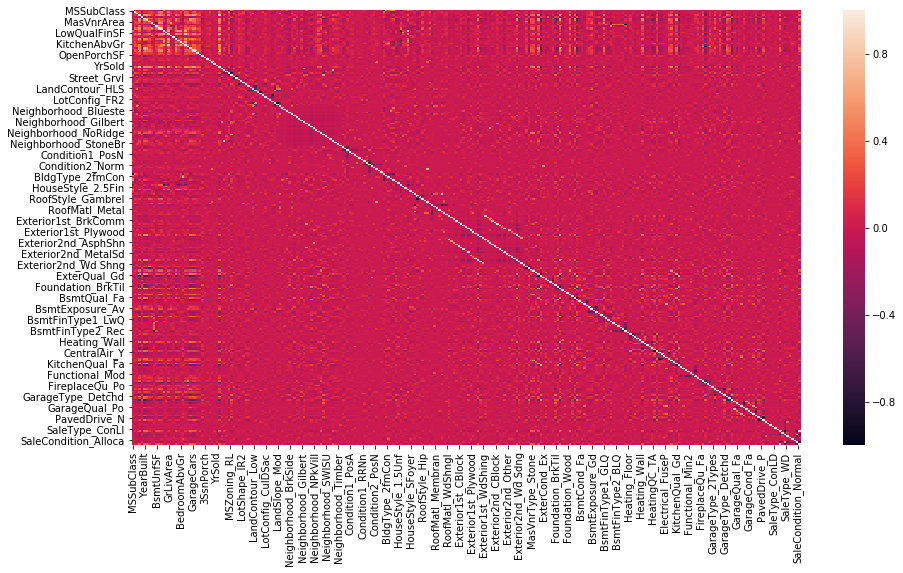

In [115]:
corr = data.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr)
data.columns

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [122]:
y = data['SalePrice']
X = data.drop(['SalePrice'], axis = 1)

In [125]:
pearson_correlations = list()
for line in X.columns:
    pearson_correlations.append(abs(np.corrcoef(X[line], y)))

In [134]:
max_correlation = pearson_correlations[0][1][0]
min_correlation = pearson_correlations[0][1][0]
min_index = 0
max_index = 0
for i in range(1, len(pearson_correlations)):
    if max_correlation < pearson_correlations[i][1][0]:
        max_index = i
        max_correlation = pearson_correlations[i][1][0]
    if min_correlation > pearson_correlations[i][1][0]:
        min_index = i
        min_correlation = pearson_correlations[i][1][0]
print('Признак с наибольшей абсолютной корреляцией : '+str(X.columns[max_index]))
print('Значение корреляции = '+str(max_correlation)+'\n\n')

print('Признак с наименьшей абсолютной корреляцией : '+str(X.columns[min_index]))
print('Значение корреляции = '+str(min_correlation))

Признак с наибольшей абсолютной корреляцией : OverallQual
Значение корреляции = 0.7909816005838048


Признак с наименьшей абсолютной корреляцией : BsmtFinType2_GLQ
Значение корреляции = 7.551406179757798e-05


Text(0, 0.5, 'SalePrice')

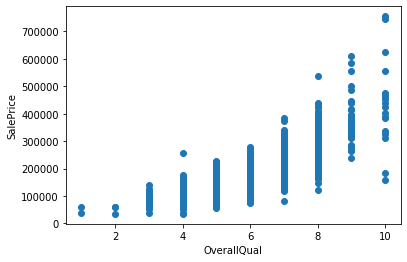

In [138]:
plt.scatter(X['OverallQual'], y)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

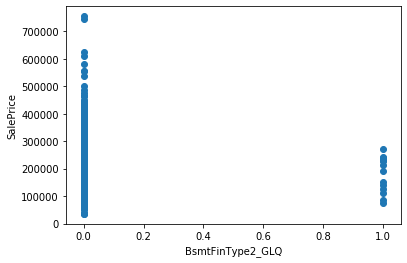

In [139]:
plt.scatter(X['BsmtFinType2_GLQ'], y)
plt.xlabel('BsmtFinType2_GLQ')
plt.ylabel('SalePrice')

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

In [140]:
y = np.log1p(y)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <a list of 10 Patch objects>)

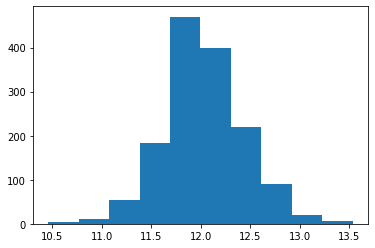

In [141]:
plt.hist(y)

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [142]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=17032019)

In [143]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 276), (365, 276), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

Начнем с KNNRegression

In [145]:
kNN = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors' : np.arange(1, 100), 
    'p' : np.arange(1, 5), 
    'weights' : ['distance', 'uniform']
}
grid_knn = GridSearchCV(kNN, param_grid=param_grid_knn)#по умолчанию тут будет 5 фолдов на кросс-валидации

In [146]:
grid_knn.fit(X_train, y_train)

C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'p': array([1, 2, 3, 4]),
                         'weights'

In [157]:
print('Качесвто на лучшем knn : '+str(mean_squared_error(grid_knn.best_estimator_.predict(X_val), y_val)**0.5))

Качесвто на лучшем knn : 0.19620262470095226


In [153]:
lin_reg = LinearRegression()
param_grid_linreg = {
    'fit_intercept' : [True, False], 
    'normalize' : [True, False], 
}
grid_linreg = GridSearchCV(lin_reg, param_grid=param_grid_linreg)


In [154]:
grid_linreg.fit(X_train, y_train)

C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [156]:
print('Качество на лучшем линейной регргессии : '+str(mean_squared_error(grid_linreg.best_estimator_.predict(X_val), y_val)**0.5))

Качество на лучшем линейной регргессии : 0.13353085894064612


In [164]:
lasso = Lasso()
param_grid_lasso = {
    'alpha' : np.linspace(0.0001, 10, 50), 
    'normalize' : [True, False], 
    'fit_intercept' : [True, False]
}
grid_lasso = GridSearchCV(lasso, param_grid=param_grid_lasso)

In [165]:
grid_lasso.fit(X_train, y_train)

C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.583354647522949, tolerance: 10.56317028310594
  positive)
C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.223298733442213, tolerance: 10.572561576906118
  positive)
C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.583354

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 2.04179592e-01, 4.08259184e-01, 6.12338776e-01,...
       7.34696531e+00, 7.55104490e+00, 7.75512449e+00, 7.95920408e+00,
       8.16328367e+00, 8.36736327e+00, 8.57144286e+00, 8.77552245e+00,
       8.97960204e+00, 9.18368163e+00, 9.38776122e+00, 9.59184082e+00,
       9.79592041e+00, 1.00000000e+01]),
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [176]:
print('Качество на лучшей lasso регргессии : '+str(mean_squared_error(grid_lasso.best_estimator_.predict(X_val), y_val)**0.5))

Качество на лучшей lasso регргессии : 0.11948029485226898


In [175]:
ridge = Ridge()
param_grid_ridge = {
    'alpha' : np.linspace(0.0001, 10, 50), 
    'normalize' : [True, False], 
    'fit_intercept' : [True, False]
}
grid_ridge = GridSearchCV(ridge, param_grid=param_grid_ridge)

In [177]:
grid_ridge.fit(X_train, y_train)

C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.90301e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.90301e-17): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 2.04179592e-01, 4.08259184e-01, 6.12338776e-01,
       8.16418367e-01, 1.02049796e+00, 1.22457755e+00, 1.42865714...
       7.34696531e+00, 7.55104490e+00, 7.75512449e+00, 7.95920408e+00,
       8.16328367e+00, 8.36736327e+00, 8.57144286e+00, 8.77552245e+00,
       8.97960204e+00, 9.18368163e+00, 9.38776122e+00, 9.59184082e+00,
       9.79592041e+00, 1.00000000e+01]),
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [178]:
print('Качество на лучшей ridge регргессии : '+str(mean_squared_error(grid_ridge.best_estimator_.predict(X_val), y_val)**0.5))

Качество на лучшей ridge регргессии : 0.13122393184674136


## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   3., 271.]),
 array([-2.30520718, -2.0641293 , -1.82305142, -1.58197354, -1.34089567,
        -1.09981779, -0.85873991, -0.61766203, -0.37658415, -0.13550627,
         0.1055716 ]),
 <a list of 10 Patch objects>)

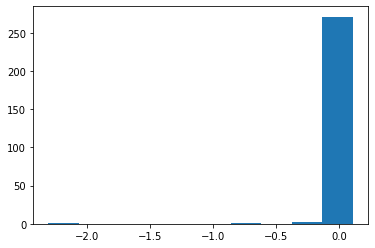

In [179]:
plt.hist(grid_lasso.best_estimator_.coef_)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   6., 186.,  82.]),
 array([-1.23736821, -1.09872244, -0.96007667, -0.8214309 , -0.68278513,
        -0.54413935, -0.40549358, -0.26684781, -0.12820204,  0.01044373,
         0.1490895 ]),
 <a list of 10 Patch objects>)

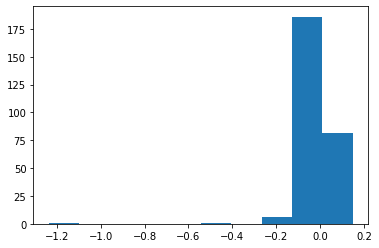

In [180]:
plt.hist(grid_ridge.best_estimator_.coef_)

Как известно, Lasso зануляет веса у тех признаков, которые не влияют в должной степени на целевую переменную. Потому у Lasso метода больше коэффициентов около нуля, чем у Ridge

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [181]:
print('Качество на лучшей lasso регргессии : '+str(mean_squared_error(grid_lasso.best_estimator_.predict(X_val), y_val)**0.5))

Качество на лучшей lasso регргессии : 0.11948029485226898


# Теория

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

При theta = 0.5 ответ = медиана. Логично предположить, что ответом будет квантиль уровня theta, но строгого доказательства привести не могу. 